# Linear Discriminant Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import discriminant_analysis as sk_lda
from sklearn import model_selection as sk_msel
from sklearn import metrics as sk_metrics
from sklearn import preprocessing as sk_pre
import statsmodels.api as sm

In [2]:
df_d=pd.read_excel('data/Default.xlsx')

In [3]:
df_d.drop(columns='Unnamed: 0', inplace=True)
df_d.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
# Encode Default and Student Variables
df_d['default'].replace({'Yes': 1, 'No':0}, inplace=True)
df_d['student'].replace({'Yes': 1, 'No':0}, inplace=True)
df_d.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [5]:
lda=sk_lda.LinearDiscriminantAnalysis().fit(df_d[['balance', 'student']], df_d['default'])

In [13]:
# Predict Default
df_pre=lda.predict(df_d[['balance', 'student']])

array([[9644,   23],
       [ 252,   81]])

Text(0, 0.5, 'True Default Status')

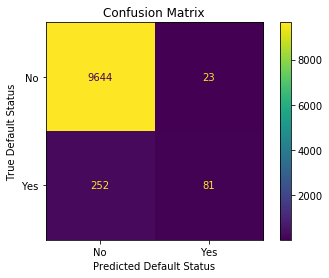

In [29]:
fig, ax = plt.subplots(1,1)
sk_metrics.plot_confusion_matrix(lda, df_d[['balance', 'student']], df_d['default'], 
                                 values_format='.0f', display_labels=['No', 'Yes'], ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Default Status')
ax.set_ylabel('True Default Status')

In [40]:
print(sk_metrics.classification_report(df_d['default'], df_pre, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.37       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.68     10000
weighted avg       0.97      0.97      0.97     10000



#### Accuracy

In [32]:
# Accuracy
sk_metrics.accuracy_score(df_d['default'], df_pre)

0.9725

In [34]:
# 1-Accuracy = error rate (wrong predicted)
(23+252)/10000

0.0275

**-> 2.75% error rate of classification**

In [36]:
# Trivial estimator = always not default has accuracy of:
(252+81)/10000

0.0333

**-> Estimator not much above 3.33% error rate of trivial estimator**

In [41]:
sk_metrics.precision_score(df_d['default'], df_pre)

0.7788461538461539

#### Accuracy

Recall for No = True Non-Defaults which are predicted right = 100% (Significance)

Recall for Yes = True Defaults which are predicted right = 24% (Sensitivity)

**-> Low Sensitivity problematic here because its important to correctly predict the Defaulters. Why does LDA perform so poorly? Because it minimizes the total error rate.**

#### Prediction with threshold other than 0.5

In [45]:
# Predicted Probabolity of default
df_prob=lda.predict_proba(df_d[['balance', 'student']])[:,1]
df_prob

array([0.00313198, 0.00280753, 0.01560305, ..., 0.00539007, 0.14018395,
       0.00015503])

In [50]:
# Predict default if prob default > 0.2
df_pre=pd.DataFrame(df_prob>0.2).replace({False:0, True:1})
df_pre.head()

,0
0,0
1,0
2,0
3,0
4,0


In [52]:
# New classification report
print(sk_metrics.classification_report(df_d['default'], df_pre, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.99      0.98      0.98      9667
         Yes       0.45      0.59      0.51       333

    accuracy                           0.96     10000
   macro avg       0.72      0.78      0.75     10000
weighted avg       0.97      0.96      0.96     10000



**-> Higher Sensitivity (59% vs. 24%) and lower Specificity (98% va. 100%)**

In [53]:
# Total error rate
1-sk_metrics.accuracy_score(df_d['default'], df_pre)

0.0373

#### ROC Curve: Tradeoff between Specificity and Sensitivity

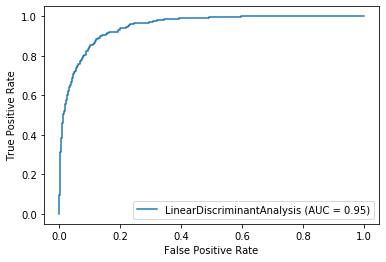

In [56]:
sk_metrics.plot_roc_curve(lda, df_d[['balance', 'student']], df_d['default'])